In [1]:
import optuna 
from IPython.display import Image
import matplotlib.pyplot as plt
import os 
from transformers import AutoModel

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(os.getcwd())

/net/fs-2/scale/OrionStore/Home/joteklem


In [3]:
# parameter check for all the models.

# Load the model
model_1 = AutoModel.from_pretrained("distilbert-base-uncased")
model_2 = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model_3 = AutoModel.from_pretrained("bert-base-uncased")
model_4 = AutoModel.from_pretrained("bert-large-uncased")

# Calculate the number of parameters
total_params_1 = sum(p.numel() for p in model_1.parameters())
total_params_2 = sum(p.numel() for p in model_2.parameters())
total_params_3 = sum(p.numel() for p in model_3.parameters())
total_params_4 = sum(p.numel() for p in model_4.parameters())

print(f"Total Parameters DistilBERT: {total_params_1}")
print(f"Total Parameters all-MiniLM-L6-v2: {total_params_2}")
print(f"Total Parameters BERT BASE: {total_params_3}")
print(f"Total Parameters BERT LARGE: {total_params_4}")


Total Parameters DistilBERT: 66362880
Total Parameters all-MiniLM-L6-v2: 22713216
Total Parameters BERT BASE: 109482240
Total Parameters BERT LARGE: 335141888


In [4]:
study_names = ['DistilBERT', 'MiniLM', 'BERT_BASE', 'BERT_LARGE']  

In [5]:
def load_studies(base_path, study_details):
    """
    Helper function to load multiple Optuna studies based on details provided.

    Parameters:
    - base_path: The base storage path
    - study_details: A dictionary where keys are descriptive study names and values are tuples (study_name, database_file)
    """
    studies = {}
    for key, (study_name, db_file) in study_details.items():
        storage = f"sqlite:///{os.path.join(base_path, db_file)}"
        studies[key] = optuna.load_study(study_name=study_name, storage=storage)
    return studies

In [6]:
def ensure_dir(directory):
    """Ensure directory exists. If not, create it."""
    if not os.path.exists(directory):
        os.makedirs(directory)

In [7]:

def plot_and_save(studies, plot_type, base_path='results', save='no'):
    """
    Plots and saves a specific type of plot for each study.

    Parameters:
    - studies: A dictionary of Optuna study objects with their names as keys.
    - plot_type: The type of plot to generate
    - save: 'yes' to save the plot as a PNG file
    """
    # Validate if the plot type is valid
    if not hasattr(optuna.visualization, plot_type):
        raise ValueError(f"Plot type {plot_type} is not available in optuna.visualization.")

    plot_function = getattr(optuna.visualization, plot_type)
    plot_dir = os.path.join(base_path, plot_type)
    ensure_dir(plot_dir)  

    for study_name, study in studies.items():
        # Ensure the filename is valid and corresponds to the study
        filename = f"{plot_type}_{study_name}.png"
        
        # Generate the plot for the current study
        fig = plot_function(study)
        
        # Update the layout to modify the title or other properties
        fig.update_layout(title=study_name)

        if save == 'yes':
            # Save the figure as an image file
            fig.write_image(filename)

        # Display the saved image inline
        display(Image(filename=filename))

In [8]:
# Example of how you might load and use the function
base_path = "/net/fs-2/scale/OrionStore/Home/joteklem/Pytorch_models"
study_details = {
    "DistilBERT_15": ("DistilBERT_15_study", "DistilBERT_15.db"),
    "DistilBERT_30": ("DistilBERT_30_study", "DistilBERT_30.db"),
    "BERT_BASE_15": ("BERT_BASE_15_study", "BERT_BASE_15.db"),
    "BERT_BASE_30": ("BERT_BASE_30_study", "BERT_BASE_30.db"),
    "BERT_LARGE_15": ("BERT_LARGE_15_study", "BERT_LARGE_15.db"),
    "BERT_LARGE_30": ("BERT_LARGE_30_study", "BERT_LARGE_30.db"),
    "MiniLM_15": ("MiniLM_15_study", "MiniLM_15.db"),
    "MiniLM_30": ("MiniLM_30_study", "MiniLM_30.db")
}

studies = load_studies(base_path, study_details)

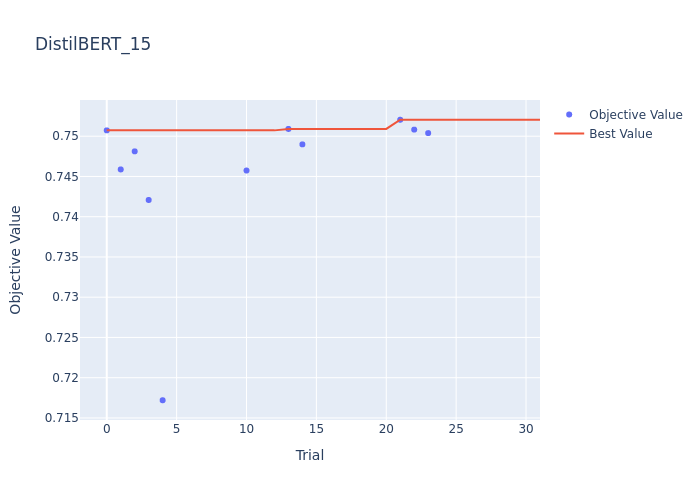

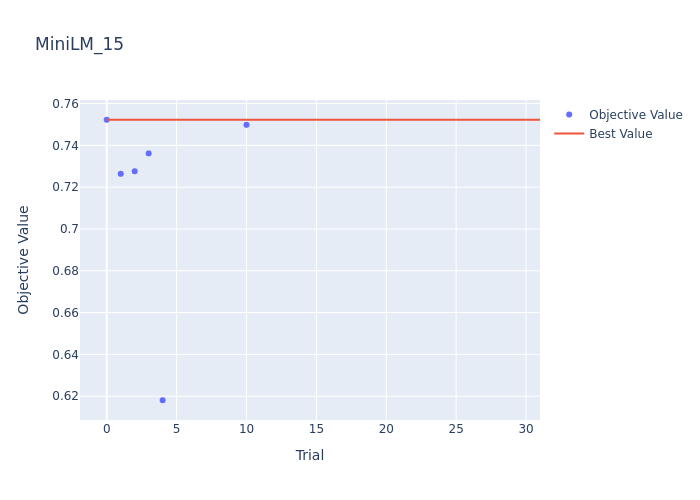

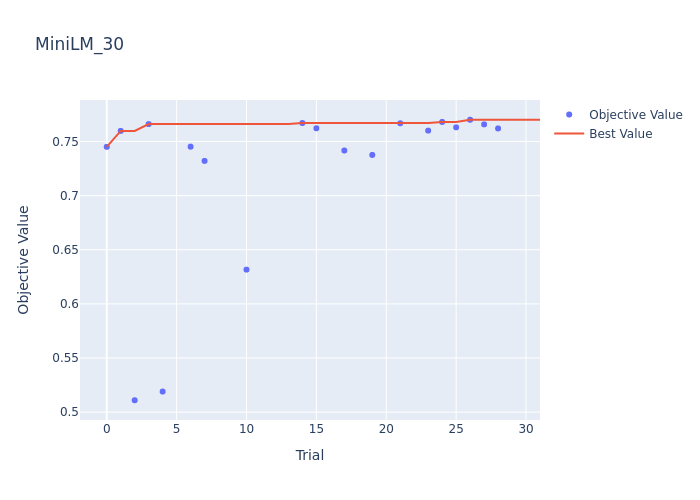

In [22]:
plot_and_save(studies, 'plot_optimization_history', base_path='results', save='yes')

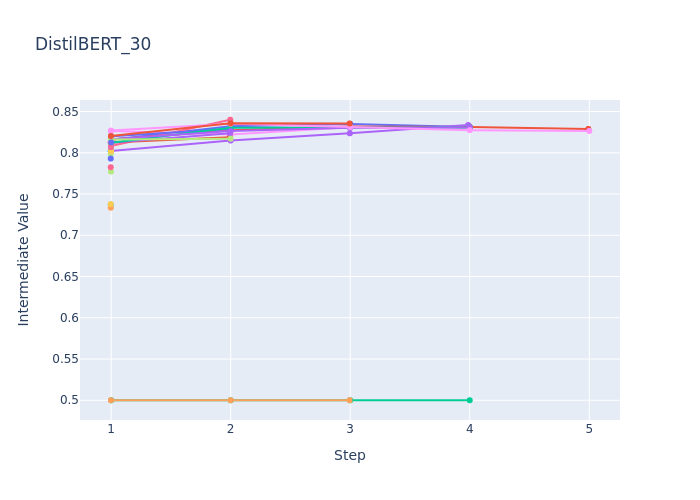

[W 2024-04-20 13:26:17,757] You need to set up the pruning feature to utilize `plot_intermediate_values()`


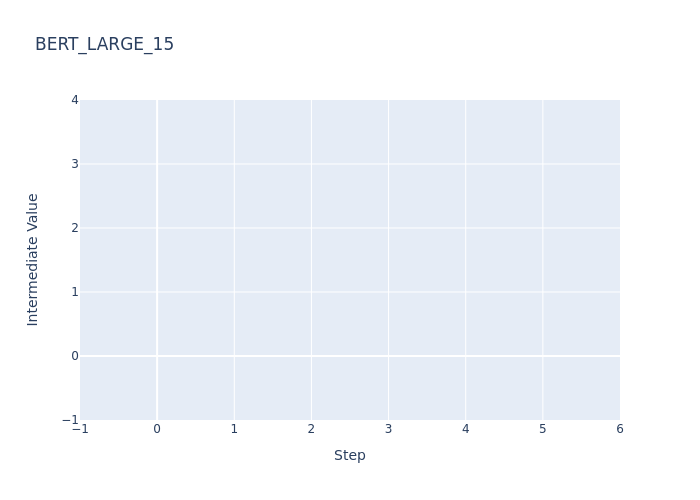

[W 2024-04-20 13:26:17,814] You need to set up the pruning feature to utilize `plot_intermediate_values()`


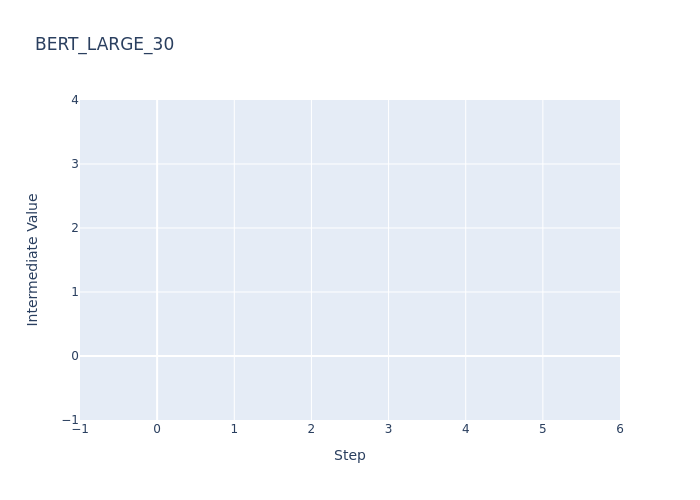

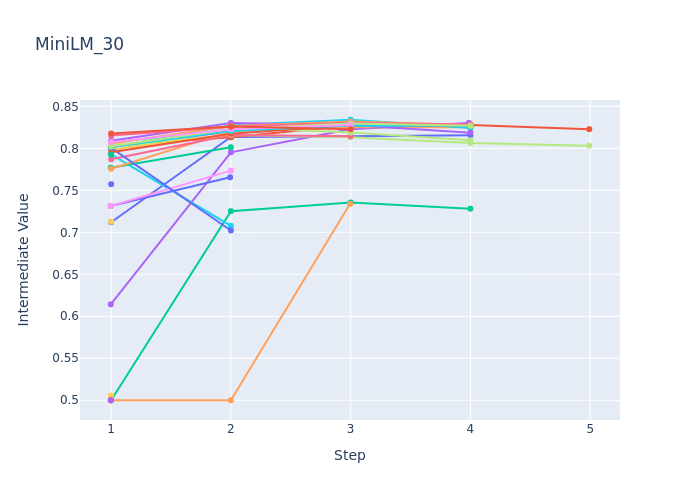

In [23]:
plot_and_save(studies, 'plot_intermediate_values', base_path='results', save='yes')

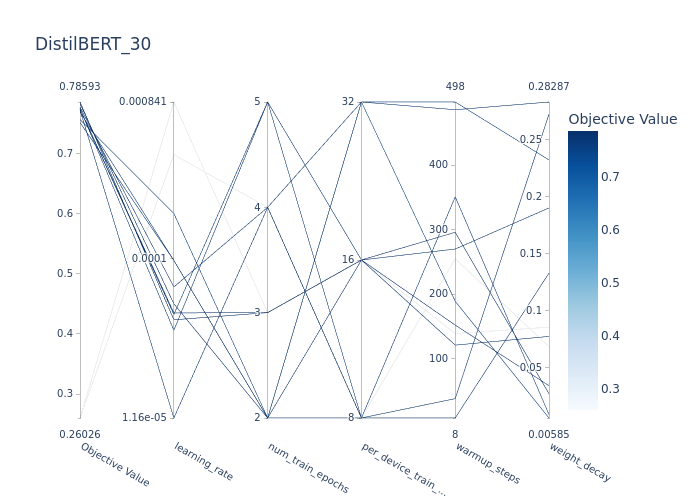

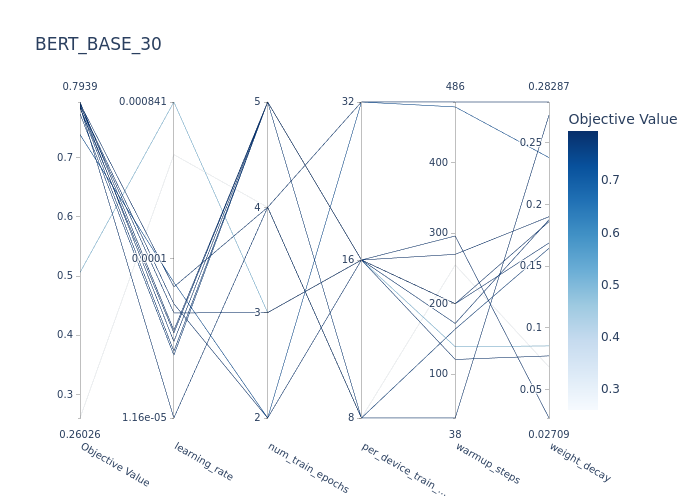

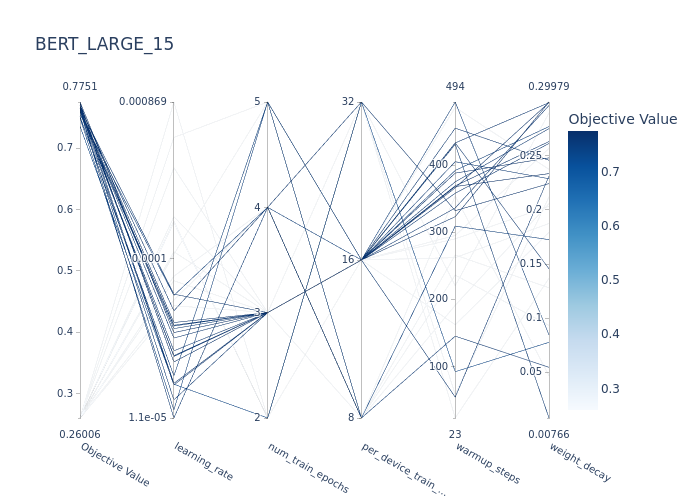

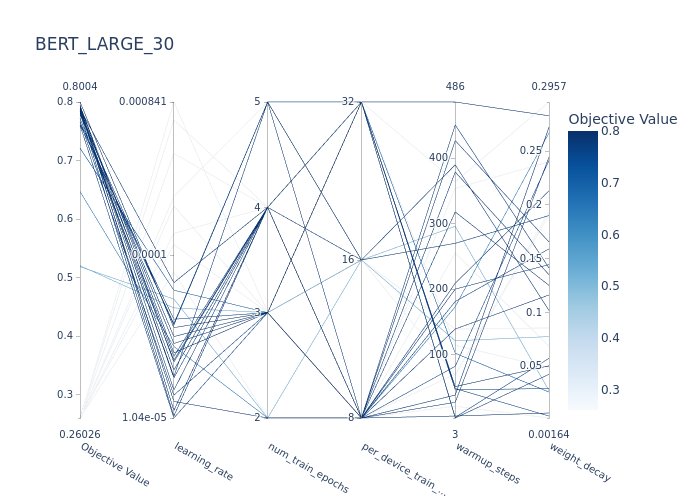

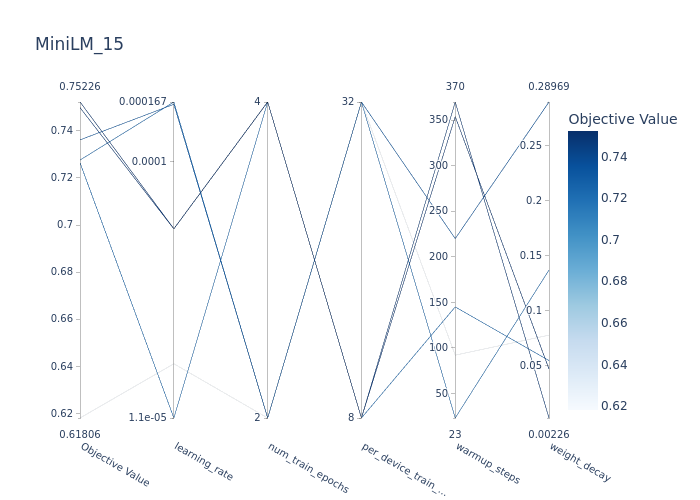

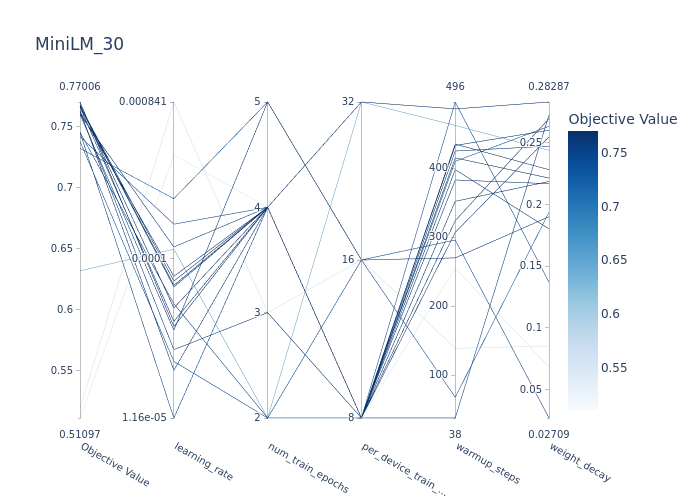

In [24]:
plot_and_save(studies, 'plot_parallel_coordinate', base_path='results', save='yes')

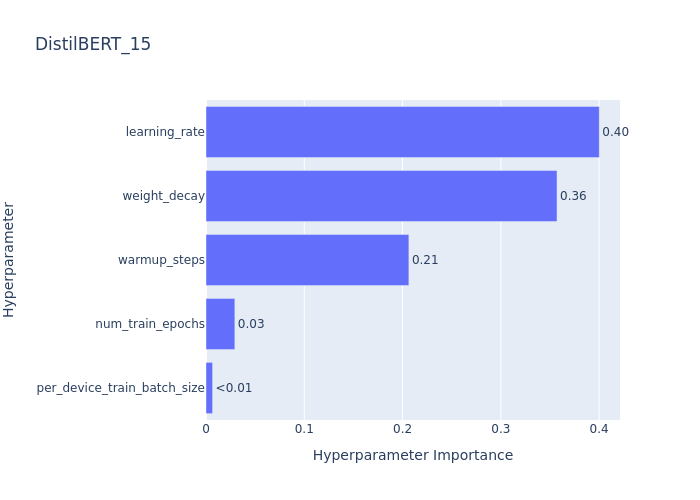

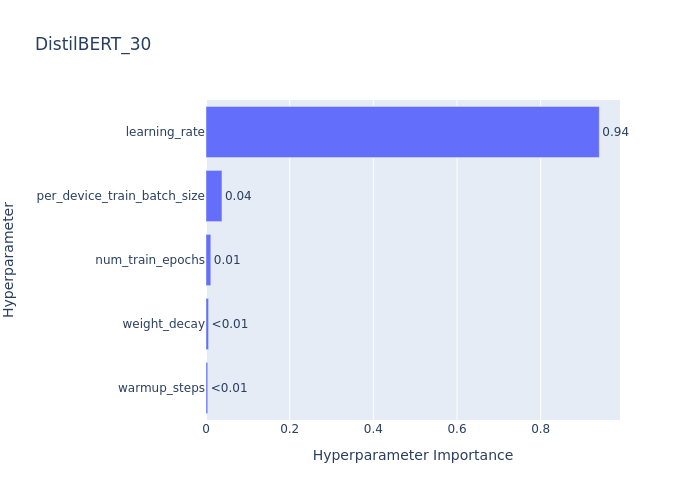

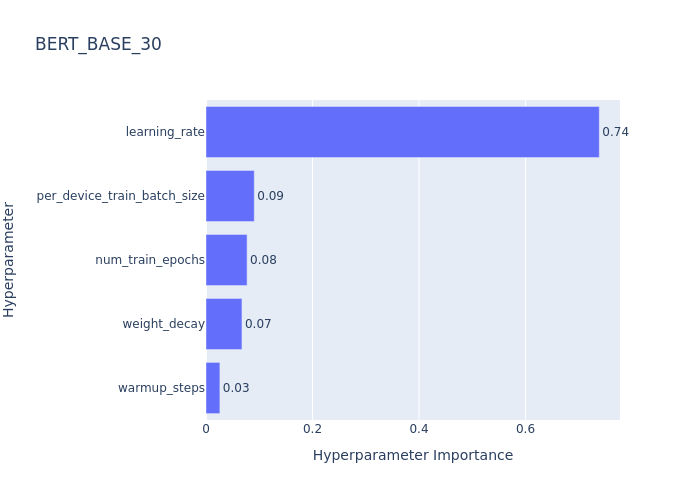

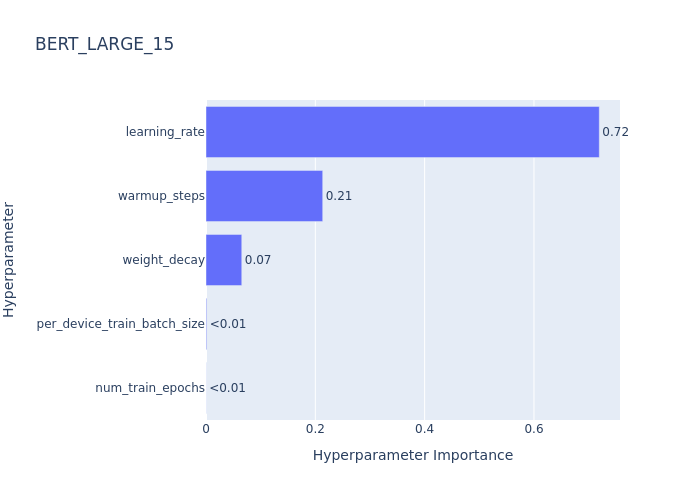

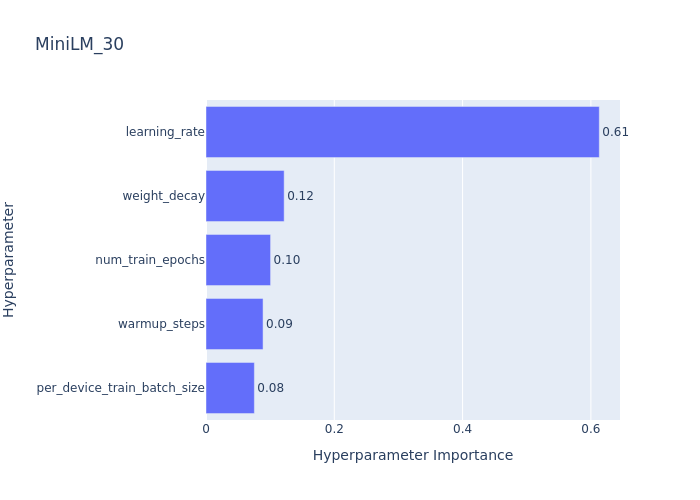

In [26]:
plot_and_save(studies, 'plot_param_importances', base_path='results', save='yes')

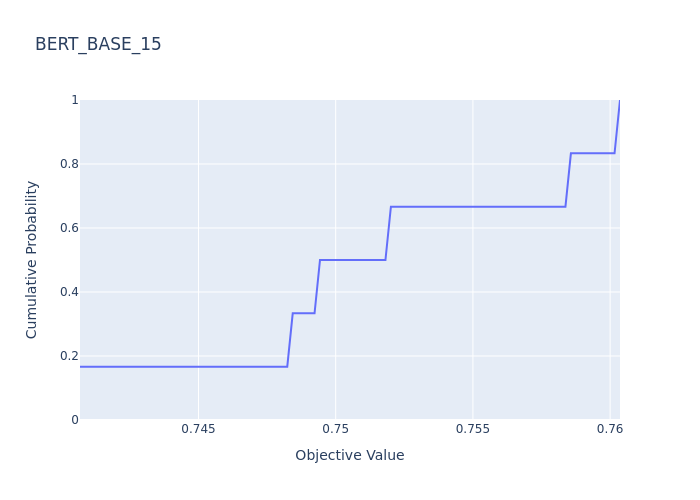

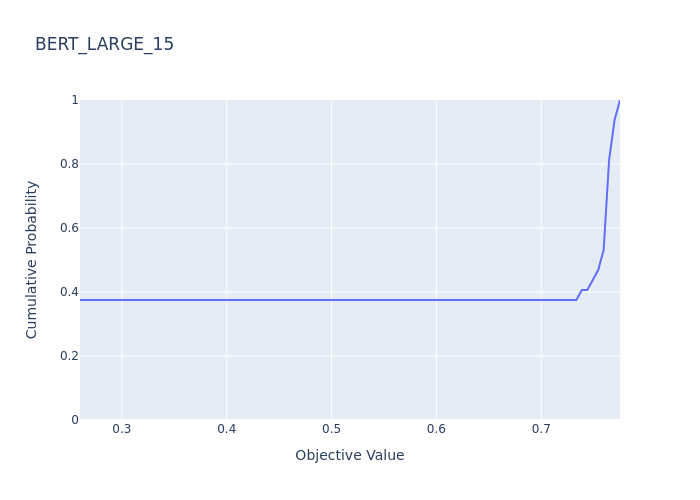

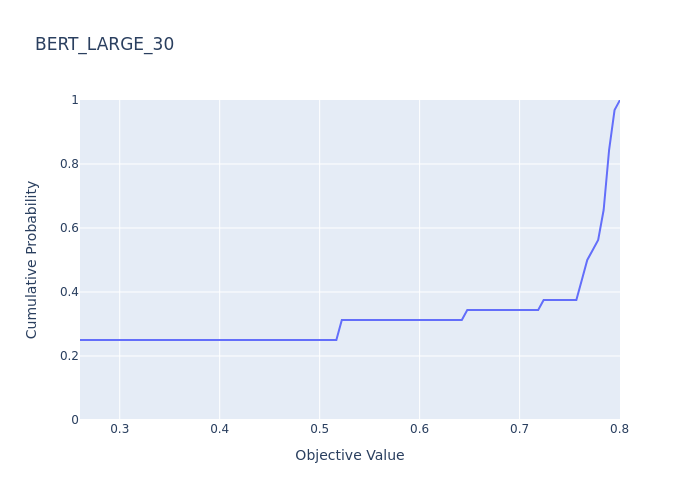

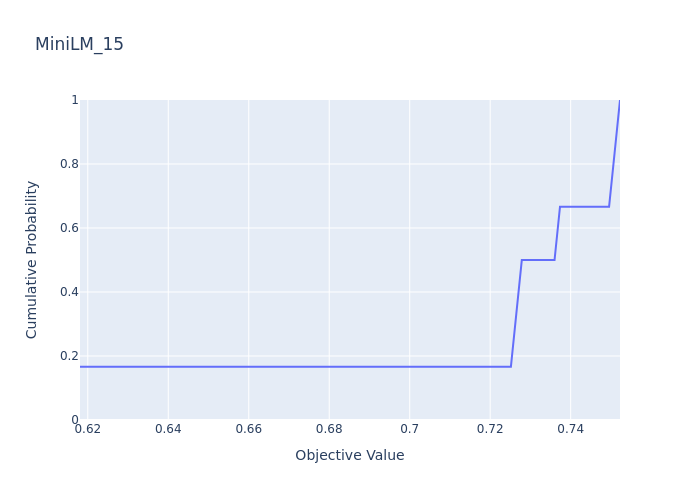

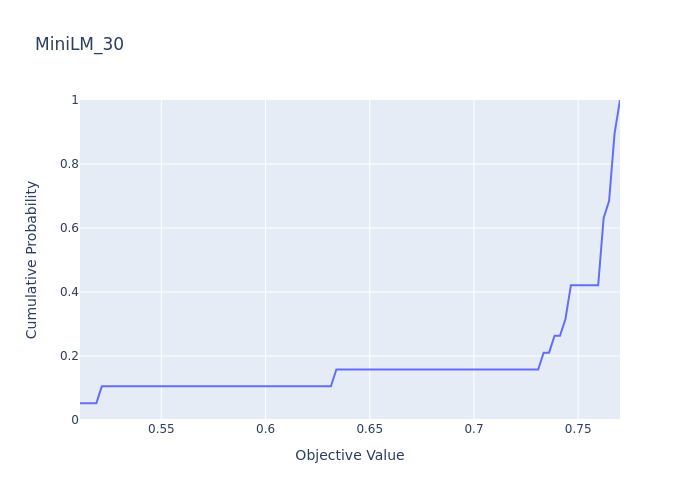

In [27]:
plot_and_save(studies, 'plot_edf', base_path='results', save='yes')

/home/work/ipykernel_8325/3764200243.py:23: ExperimentalWarning:

plot_rank is experimental (supported from v3.2.0). The interface can change in the future.



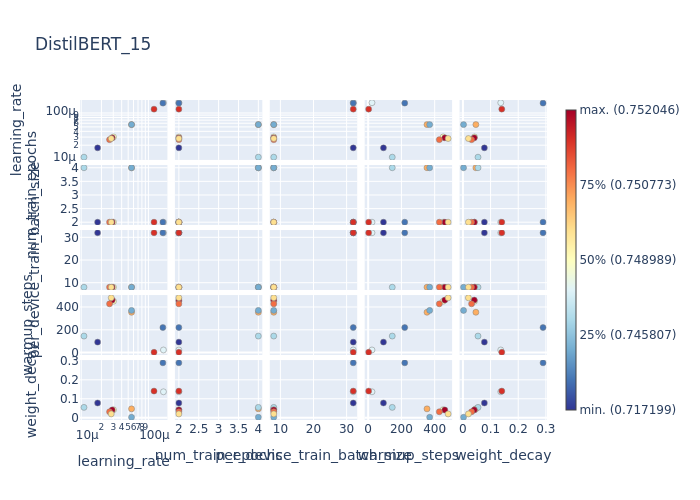

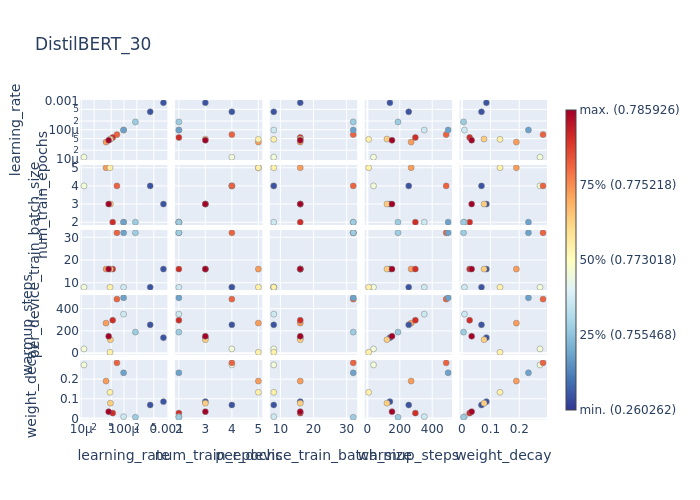

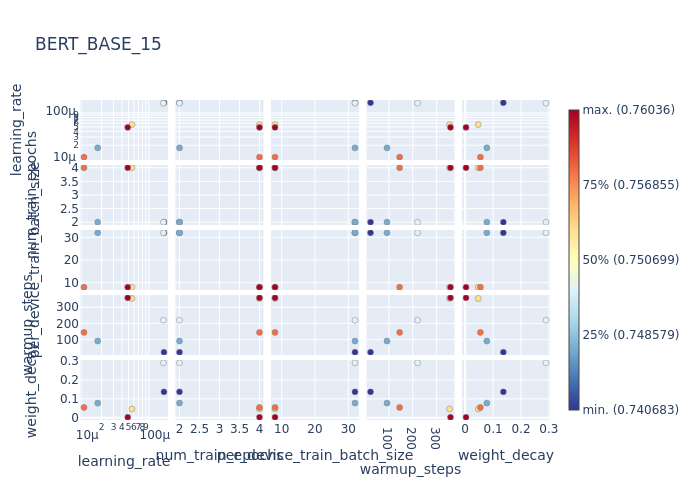

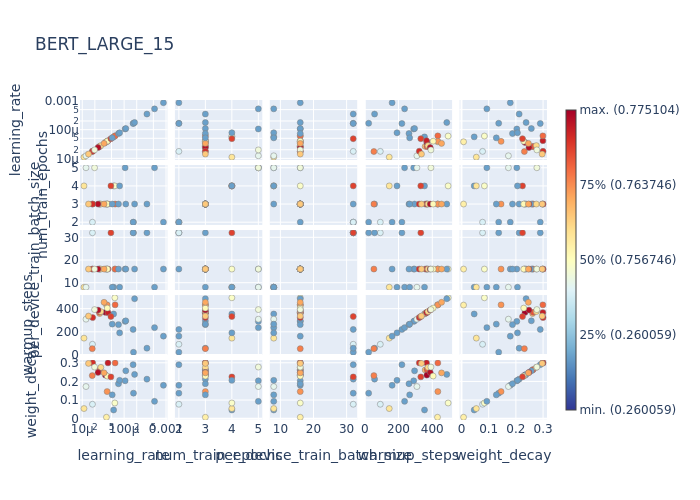

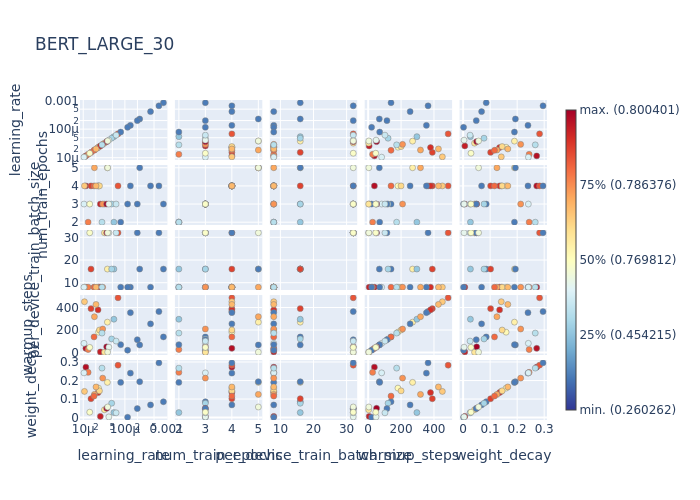

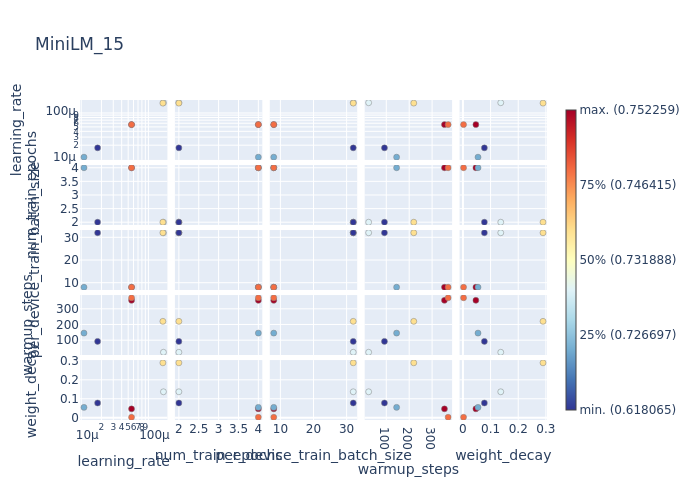

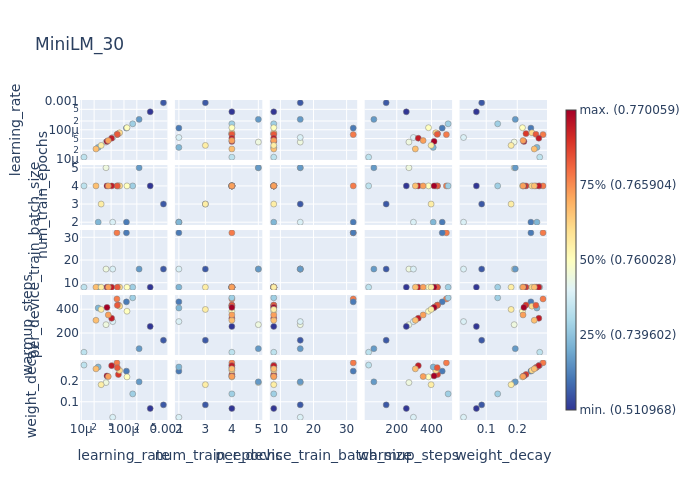

In [28]:
plot_and_save(studies, 'plot_rank', base_path='results', save='yes')

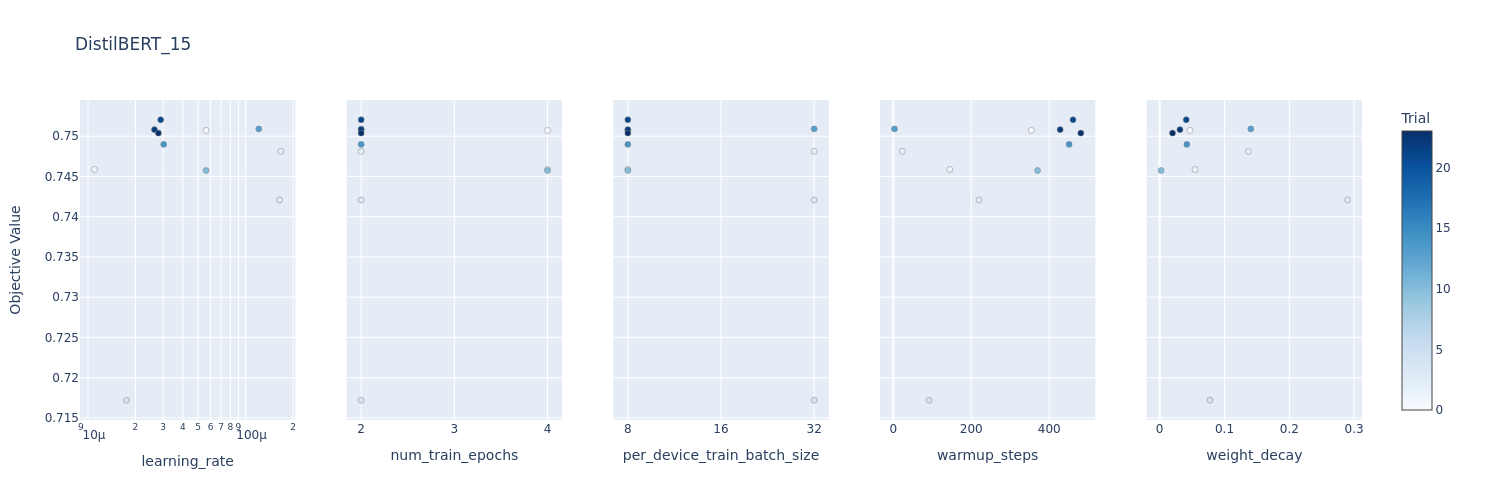

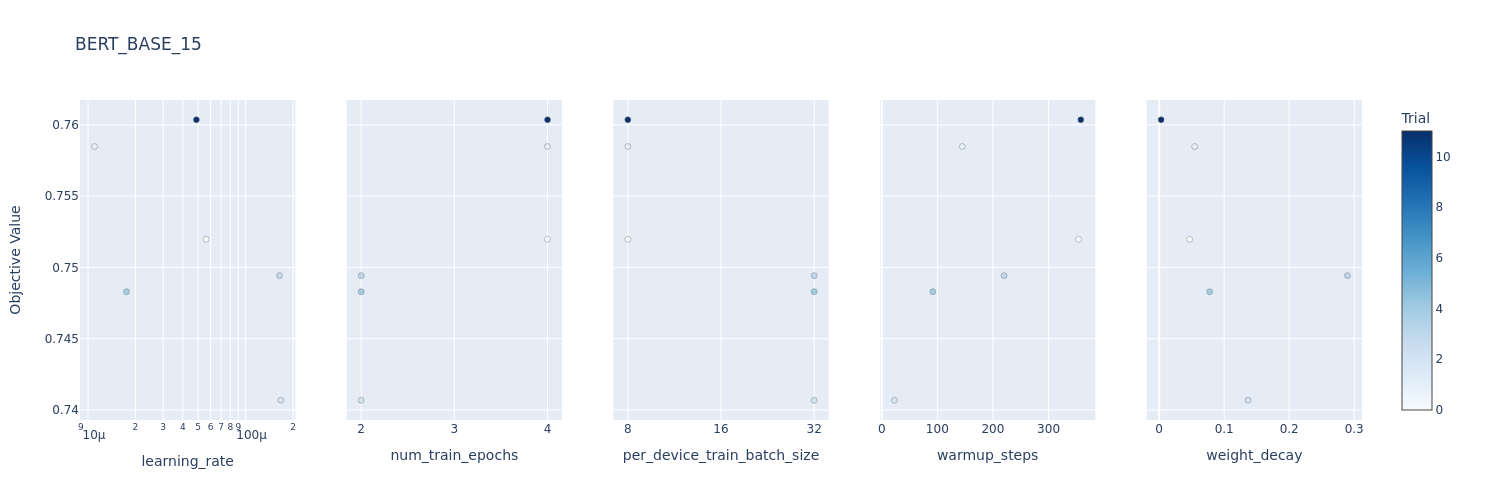

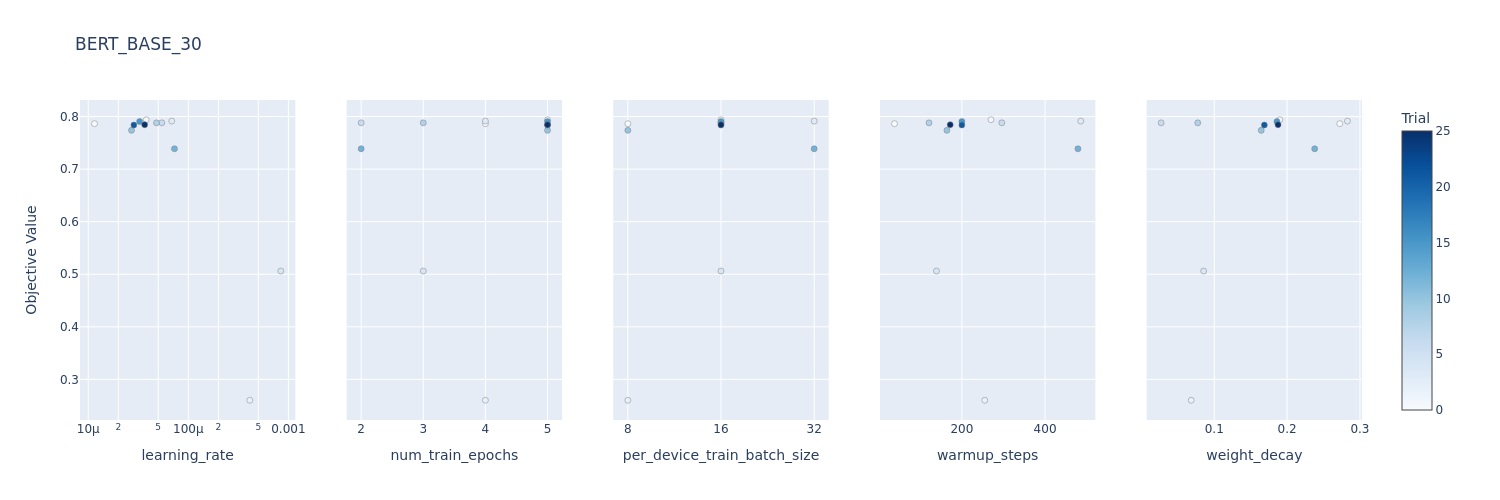

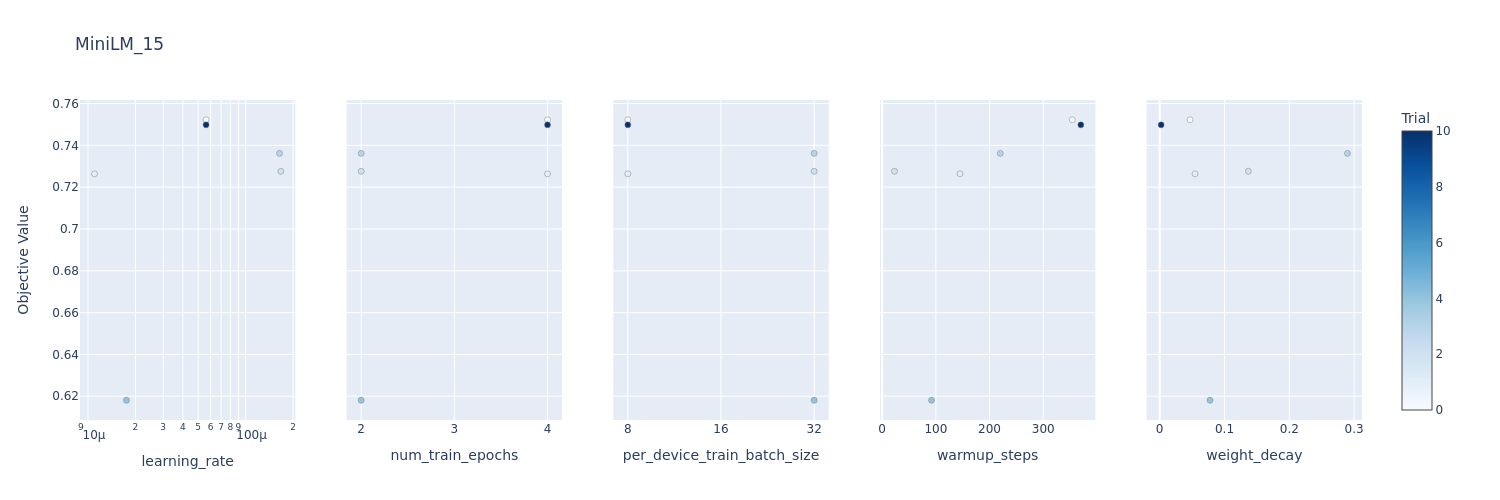

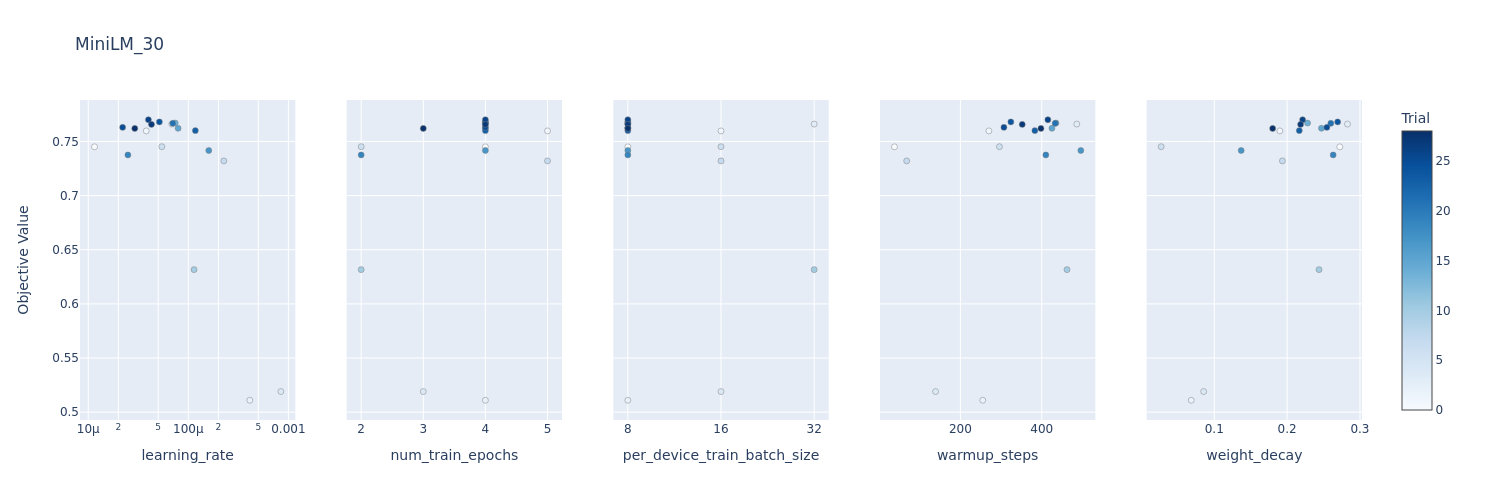

In [29]:
plot_and_save(studies, 'plot_slice', base_path='results', save='yes')

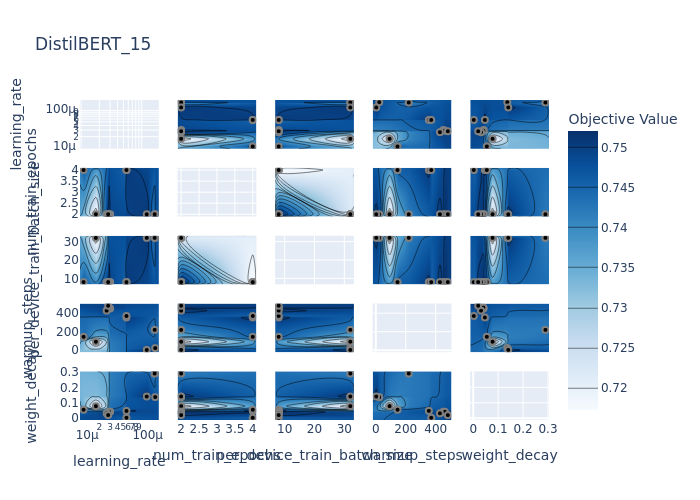

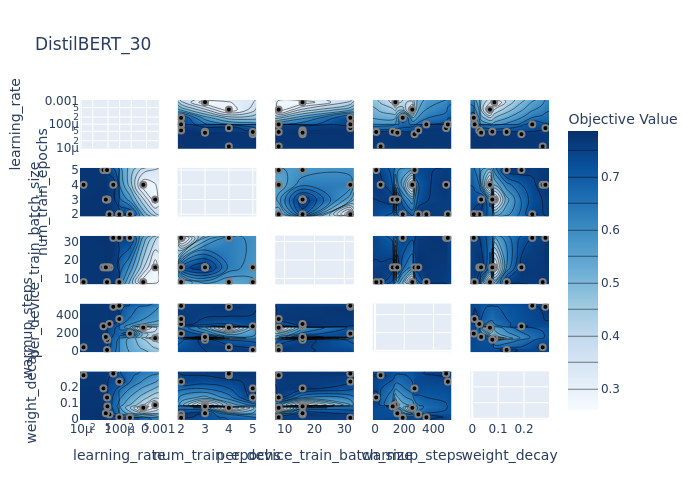

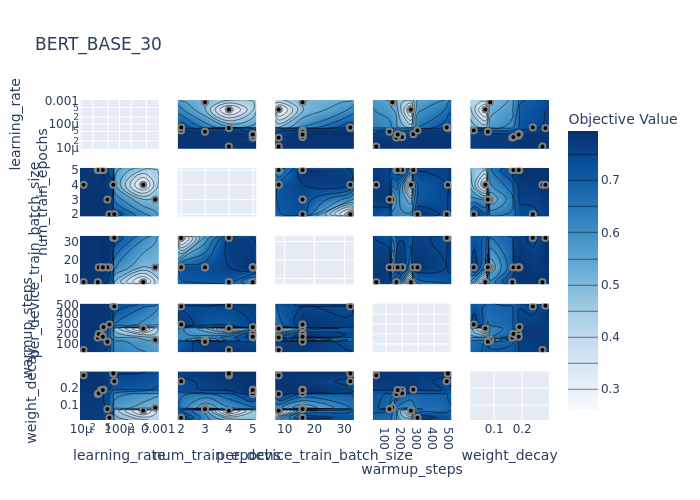

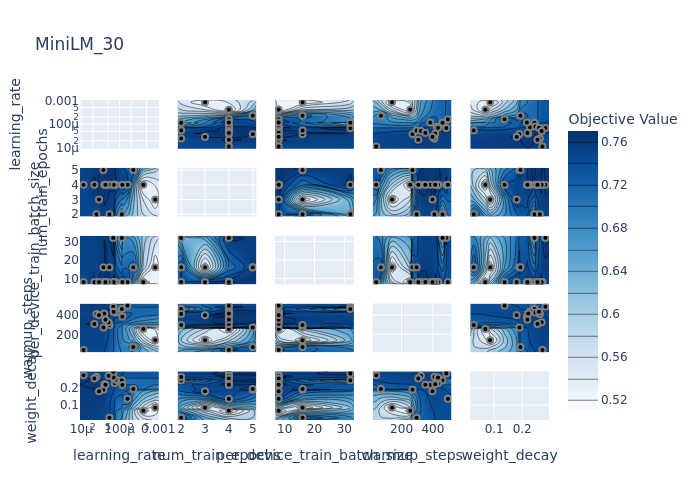

In [30]:
plot_and_save(studies, 'plot_contour', base_path='results', save='yes')

/home/work/ipykernel_31351/3764200243.py:23: ExperimentalWarning: plot_terminator_improvement is experimental (supported from v3.2.0). The interface can change in the future.
  fig = plot_function(study)
/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:129: ExperimentalWarning: RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.
  improvement_evaluator = RegretBoundEvaluator()
/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:131: ExperimentalWarning: CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.
  error_evaluator = CrossValidationErrorEvaluator()
  0%|          | 0/32 [00:00<?, ?it/s]/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Pyth

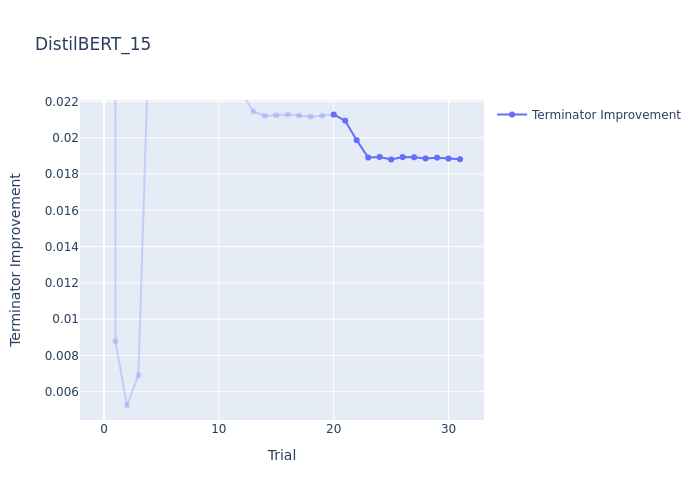

/home/work/ipykernel_31351/3764200243.py:23: ExperimentalWarning:

plot_terminator_improvement is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:129: ExperimentalWarning:

RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:131: ExperimentalWarning:

CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

  0%|          | 0/32 [00:00<?, ?it/s]/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/botorch/models/transforms/outcome.py:304: UserWarning:

std(): degrees of free

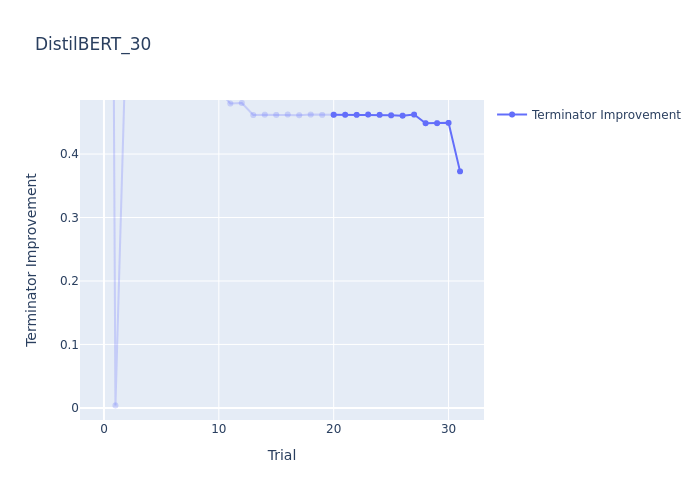

/home/work/ipykernel_31351/3764200243.py:23: ExperimentalWarning:

plot_terminator_improvement is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:129: ExperimentalWarning:

RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:131: ExperimentalWarning:

CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

  0%|          | 0/32 [00:00<?, ?it/s]/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/botorch/models/transforms/outcome.py:304: UserWarning:

std(): degrees of free

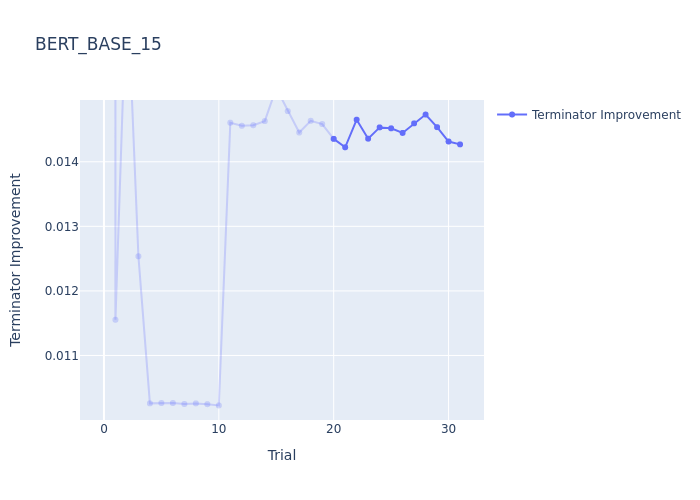

/home/work/ipykernel_31351/3764200243.py:23: ExperimentalWarning:

plot_terminator_improvement is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:129: ExperimentalWarning:

RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:131: ExperimentalWarning:

CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

  0%|          | 0/32 [00:00<?, ?it/s]/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/botorch/models/transforms/outcome.py:304: UserWarning:

std(): degrees of free

/home/work/ipykernel_31351/3764200243.py:23: ExperimentalWarning:

plot_terminator_improvement is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:129: ExperimentalWarning:

RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:131: ExperimentalWarning:

CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

  0%|          | 0/32 [00:00<?, ?it/s]/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/botorch/models/transforms/outcome.py:304: UserWarning:

std(): degrees of free

/home/work/ipykernel_31351/3764200243.py:23: ExperimentalWarning:

plot_terminator_improvement is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:129: ExperimentalWarning:

RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:131: ExperimentalWarning:

CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

  0%|          | 0/32 [00:00<?, ?it/s]/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/botorch/models/transforms/outcome.py:304: UserWarning:

std(): degrees of free

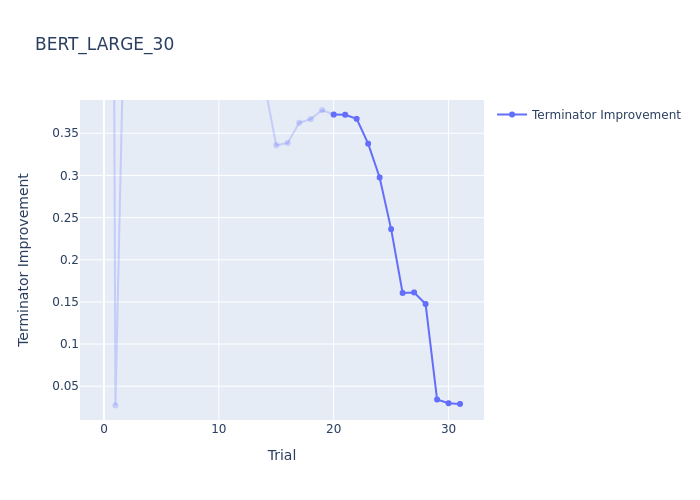

/home/work/ipykernel_31351/3764200243.py:23: ExperimentalWarning:

plot_terminator_improvement is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:129: ExperimentalWarning:

RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:131: ExperimentalWarning:

CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

  0%|          | 0/32 [00:00<?, ?it/s]/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/botorch/models/transforms/outcome.py:304: UserWarning:

std(): degrees of free

/home/work/ipykernel_31351/3764200243.py:23: ExperimentalWarning:

plot_terminator_improvement is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:129: ExperimentalWarning:

RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/optuna/visualization/_terminator_improvement.py:131: ExperimentalWarning:

CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

  0%|          | 0/32 [00:00<?, ?it/s]/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/botorch/models/transforms/outcome.py:304: UserWarning:

std(): degrees of free

In [9]:
plot_and_save(studies, 'plot_terminator_improvement', base_path='results', save='yes')